In [1]:
from PIL import Image

# Charger l'image
img = Image.open("C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/intemporellement-votre.jpg") 
img = Image.open("C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/15180252235774_simba.png") 


# Afficher l'image chargée
img.show()

In [2]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 250 px, hauteur : 263 px


In [3]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : L
Valeur du pixel situé en (20,100) : 196


In [4]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
print(mat)

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

[[247 245 245 ... 224 228 228]
 [246 244 243 ... 228 230 230]
 [244 242 240 ... 230 231 231]
 ...
 [183 169 169 ... 108  95 102]
 [170 160 171 ...  81  95  99]
 [150 155 174 ... 133 115 111]]
Taille de la matrice de pixels : (263, 250)


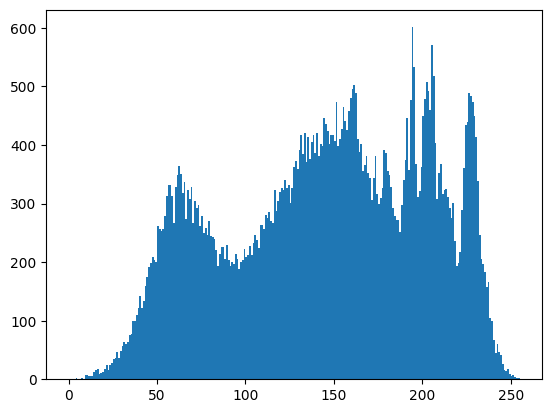

In [5]:
import matplotlib.pyplot as plt

# Charger l'image comme matrice de pixels
img = np.array(Image.open("C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/intemporellement-votre.jpg"))
img = np.array(Image.open("C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/15180252235774_simba.png"))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

In [6]:
# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, img.shape)

print(type(img))

print("Dimensions du tableau (shape) :", img.shape)
print("Type de données du tableau (dtype) :", img.dtype)

# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(img + noise).convert('L')
noisy_img.show()

<class 'numpy.ndarray'>
Dimensions du tableau (shape) : (263, 250)
Type de données du tableau (dtype) : uint8


In [7]:
from PIL import ImageFilter

# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
noisy_img.filter(ImageFilter.BoxBlur(1)).show()

In [8]:
from keras.models import Sequential

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

In [9]:
from keras.layers import Conv2D, MaxPooling2D

# Ajout de la première couche de convolution, suivie d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))

# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Ajout de la première couche de pooling
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from keras.layers import Flatten, Dense

my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

# Ajout de la première couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la deuxième couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la dernière couche fully-connected qui permet de classifier
my_VGG16.add(Dense(1000, activation='softmax'))

In [11]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

In [12]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.16.1
3.3.3


In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

In [14]:
img = load_img("C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/chat-roux.jpeg", target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [15]:
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


In [16]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top 3 : [('n02123159', 'tiger_cat', 0.4742974), ('n02124075', 'Egyptian_cat', 0.31934333), ('n02123045', 'tabby', 0.10532761)]


Dans la section précédente, nous avons utilisé le réseau VGG-16 fourni par Keras pour résoudre le même problème de classification que celui sur lequel il a été pré-entraîné (classification à 1000 classes avec ImageNet). En pratique, vous serez très probablement confrontés à un nouveau problème de classification. Dans ce cas, savoir mettre en oeuvre le Transfer Learning vous sera très utile ! 

Je vous encourage tout d'abord à bien vous remettre en tête les stratégies possibles, introduites dans le chapitre précédent : fine-tuning total, extraction des features, et fine-tuning partiel. 

Dans les trois cas, il faut remplacer les dernières couches fully-connected qui permettent de classifier l'image dans une des 1000 classes ImageNet) par un classifieur plus adapté à notre problème.  Par exemple, supposons qu'on veuille différencier un chat d'un chien (classification binaire). La suppression des dernières couches se fait en ajoutant l'argument  include_top = False  lors de l'import du modèle pré-entraîné. Dans ce cas, il faut aussi préciser les dimensions des images en entrée (input_shape ) : 

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras import Model
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
predictions = Dense(10, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

Stratégie #1 : fine-tuning total

La stratégie #1 doit être utilisée lorsque la nouvelle collection d'images est grande : dans ce cas, on peut se permettre d'entraîner tout le réseau sans courir le risque d'overfitting. De plus, comme les paramètres de toutes les couches (sauf de la dernière) sont initialement ceux du réseau pré-entraîné, la phase d'apprentissage sera faite plus rapidement que si l'initialisation avait été aléatoire.

Ici, on entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables" :

In [ ]:
for layer in model.layers:
   layer.trainable = True

Stratégie #2 : extraction de features

La stratégie #2 doit être utilisée lorsque la nouvelle collection d'images est petite et similaire aux images de pré-entraînement. En effet, entraîner le réseau sur aussi peu d'images est dangereux puisque le risque d'overfitting est important. De plus, si les nouvelles images ressemblent aux anciennes, elles peuvent alors être représentées par les mêmes features.

On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :

In [ ]:
for layer in model.layers:
   layer.trainable = False

Stratégie #3 : fine-tuning partiel

On utilise cette stratégie lorsque la nouvelle collection d'images est petite mais très différente des images du pré-entraînement. D'une part, comme il y a peu d'images d'entraînement, la stratégie #1 qui consiste à entraîner tout le réseau n'est pas envisageable à cause du risque d'overfitting.

D'autre part, on élimine également la stratégie #2 puisque les nouvelles images ont très peu de points communs avec les anciennes : utiliser les features du réseau pré-entraîné pour les représenter n'est pas une bonne idée ! Mais souvenez-vous : les features des couches basses sont simples et génériques (donc peuvent se retrouver dans deux images très différentes), tandis que celles des couches hautes sont complexes et spécifiques au problème. Ainsi, la stratégie de fixer les couches basses et d'entraîner le classifieur et les couches hautes constitue un bon compromis.

On entraîne le nouveau classifieur et les couches hautes :

In [ ]:
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in model.layers[:5]:
   layer.trainable = False

Entraînement du réseau
Il ne reste plus qu'à compiler le nouveau modèle, puis à l'entraîner  :

In [ ]:
# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)
